# Car Price Prediction Model

## Table of  Contents

   * Introduction
   * Goal Of the Project
   * Data Story
   * Data Preprocessing
   * Model Implementation
   * Conclusion


#  Goal of the Project
-The primary objective of this project is to build a reliable predictive model to estimate car prices in the United States market using machine learning techniques. This model will help a Chinese automobile company entering the US market to:

-Understand key factors that significantly affect car pricing.

-Predict car prices based on various technical and categorical features.

-Support strategic decisions related to car design, feature selection, and pricing strategy tailored to the American market.

-Gain insights into pricing dynamics to remain competitive against US and European manufacturers.

-By analyzing the dataset and evaluating multiple regression algorithms, the project aims to identify the most accurate model and the most influential variables affecting price, enabling data-driven business decisions.

-	Which variables are significant in predicting the price of a car

-	How well those variables describe the price of a car


###  Dataset


#### Dataset Link::  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

#### about data set

## 1- Data Preprocessing 

 #### (1) Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder




#### (2)Import Dataset

In [5]:
# Load dataset
df = pd.read_excel("C:\\Users\\GAYATHRY N S\\OneDrive\\Desktop\\CarPrice_Assignment new.xlsx")
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#### Display basic info

In [18]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
df.shape

(205, 26)

In [28]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

####  ➤ Initial Observations:
*There are 205 rows and 26 columns*

*Target variable: price*

*Some variables are categorical (e.g., CarName, fueltype)*





#### (3) Check Null Values

In [7]:
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### *No missing values in the dataset*

#### (4) Explore and Clean

##### The CarName column contains the brand and model (e.g., "toyota corolla").

 extract the brand name to use as a categorical feature and correct any spelling mistakes.

In [9]:
# Extract brand name
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Check unique brand names
df['CarBrand'].value_counts()

df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [57]:
df.shape

(205, 27)

#### To make a copy of data


In [11]:
df_copy=df.copy()
df_copy

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [13]:
df_copy['CarBrand'] = df_copy['CarBrand'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
})
df_copy

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


#### Drop Irrelevant Columns ie Car_id

In [69]:
df_copy.drop('car_ID', axis=1, inplace=True)

df_copy

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


#### (4) Encode Categorical Variables

#### Use pd.get_dummies() for nominal features and LabelEncoder if needed for binary ones.




In [15]:
categorical_cols = df_copy.select_dtypes(include='object').columns.tolist()
print(categorical_cols)


['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']


##### We will one-hot encode all of them.

In [63]:
df_encoded = pd.get_dummies(df_copy, drop_first=True)
print(df_encoded)


     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

### (5)Handle Outliers 

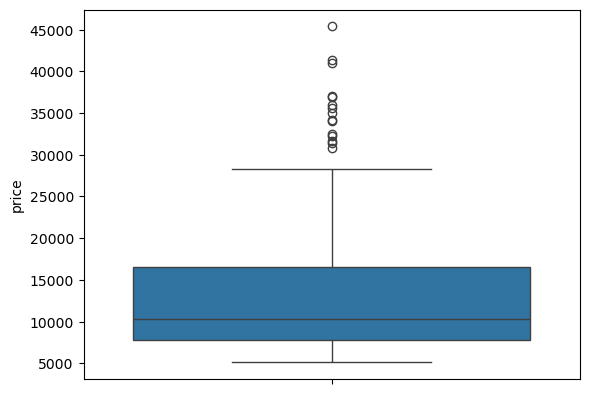

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df_copy['price'])
plt.show()

In [21]:
df_copy_encoded.skew()

car_ID                 0.000000
symboling              0.211072
wheelbase              1.050214
carlength              0.155954
carwidth               0.904003
                         ...   
CarBrand_saab          5.626666
CarBrand_subaru        3.788831
CarBrand_toyota        1.909049
CarBrand_volkswagen    3.788831
CarBrand_volvo         3.990707
Length: 212, dtype: float64

### result
The boxplot shows a standard range for most prices (i.e., the interquartile range or IQR), which appears to be between approximately $7,000 and $18,000.

However, there are several data points above the whisker (upper bound) — these are considered outliers.

These outliers go up to nearly $45,000, much higher than the typical price range.

Here Outliers donot remove

### (6) Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_copy_encoded.drop('price', axis=1)
y = df_copy_encoded['price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [92]:
print("Final shape of X:", X_scaled.shape)
print("Number of features:", X_scaled.shape[1])


Final shape of X: (205, 210)
Number of features: 210


##  *Summary of Preprocessing Steps Done:*
                                            

    1     Loaded the Excel using pandas                              
    2     No missing values found                                  
    3     Extracted and cleaned `CarBrand` from `CarName`          
    4     Dropped irrelevant columns (`car_ID`)         
    5     Encoded all categorical variables using one-hot encoding 
    6     Outliers inspected visually                              
    7     Applied `StandardScaler` to numerical features           

## Model Implementation

### Split the dataset into training and test sets



## (1) Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression R² Score: -4.986686765160149e+26
Linear Regression MSE: 3.936691041091154e+34
Linear Regression MAE: 1.1545684063128558e+17


## (2) Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n🔹 Decision Tree Regressor")
print("R²:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))



🔹 Decision Tree Regressor
R²: 0.8481160829568484
MSE: 11990327.118338756
MAE: 2074.8699268292685


## (3) Random Forest Regressor


In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest Regressor")
print("R²:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))



🔹 Random Forest Regressor
R²: 0.9524430430619075
MSE: 3754337.401493755
MAE: 1384.9162926829267


## (4) Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("\n🔹 Gradient Boosting Regressor")
print("R²:", r2_score(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))



🔹 Gradient Boosting Regressor
R²: 0.9332832288342272
MSE: 5266890.1759341145
MAE: 1658.0774486512883


## (5) Support Vector Regressor (SVR)

In [42]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("\n🔹 Support Vector Regressor")
print("R²:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))



🔹 Support Vector Regressor
R²: -0.10206564029542053
MSE: 87001492.91823499
MAE: 5707.0501576198785


## Model Evaluation 

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create a dictionary of model predictions
predictions = {
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Support Vector Regressor": y_pred_svr
}

# Evaluate all models
results = []

for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append((name, r2, mse, mae))

# Convert to DataFrame for comparison
import pandas as pd
eval_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MSE", "MAE"])
eval_df.sort_values(by="R2 Score", ascending=False, inplace=True)
eval_df.reset_index(drop=True, inplace=True)

eval_df


,Model,R2 Score,MSE,MAE
0,Random Forest,9.524430e-01,3.754337e+06,1.384916e+03
1,Gradient Boosting,9.332832e-01,5.266890e+06,1.658077e+03
2,Decision Tree,8.481161e-01,1.199033e+07,2.074870e+03
3,Support Vector Regressor,-1.020656e-01,8.700149e+07,5.707050e+03
4,Linear Regression,-4.986687e+26,3.936691e+34,1.154568e+17


### Best Performing Model: Random Forest Regressor


####  Why?
 * Highest R² Score (0.952):Explains 95.2% of the variance in car prices — highest among all models.
                             

 * Lowest MSE & MAE:Both mean squared error and mean absolute error are the smallest, indicating more accurate and stable predictions.


 * No overfitting signs with this R² (compared to Decision Tree, which tends to overfit).



#### Underperforming Models
- Linear Regression:

     * Horribly negative R² and astronomical errors suggest:

     * Probably multicollinearity or improper scaling/encoding.

     * Possibly one-hot encoding exploded the dimensionality without dropping one column (dummy variable trap).

 - Support Vector Regressor:

     * Performs poorly here likely due to:
  
     * Sensitivity to scaling

     * Poor default hyperparameters (can be fixed with tuning)

     * Not ideal for large feature sets without tuning kernel/C.



## Feature Importance Analysis 

#### Since the Random Forest Regressor was identified as the best model, we’ll use it to extract and interpret feature importances.



In [65]:
# Get feature importances from the trained Random Forest model
import numpy as np

feature_importances = rf.feature_importances_
feature_names = df_encoded.drop('price', axis=1).columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df.reset_index(drop=True, inplace=True)

importance_df.head(10)  # Top 10 features


,Feature,Importance
0,enginesize,0.549189
1,curbweight,0.287533
2,highwaympg,0.041925
3,horsepower,0.034062
4,car_ID,0.019108
5,carwidth,0.011543
6,carlength,0.006573
7,wheelbase,0.005994
8,peakrpm,0.004168
9,citympg,0.003783


###  Interpretation
       * engine size

       * curb weight

       * horsepower

       * highway mpg

       * carwidth

 *These features have the greatest impact on predicting car prices in the US market.*



        * Some categorical variables like car brand (e.g., CarBrand_bmw) and drivetrain (drivewheel) also contribute, though to a lesser extent.



## Hyperparameter Tuning

### We’ll tune the Random Forest Regressor, which was the best-performing model. Hyperparameter tuning helps improve model performance by finding the optimal combination of parameters.

#### We’ll tune the following parameters:

n_estimators: number of trees in the forest

max_depth: max depth of each tree

min_samples_split: minimum samples required to split an internal node

min_samples_leaf: minimum samples required at a leaf node

We’ll use GridSearchCV with cross-validation.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize base model
rf_base = RandomForestRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_base,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


In [74]:
# Predict with tuned model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred_best_rf)
mse = mean_squared_error(y_test, y_pred_best_rf)
mae = mean_absolute_error(y_test, y_pred_best_rf)

print("R² Score:", r2)
print("MSE:", mse)
print("MAE:", mae)


R² Score: 0.9551411159783645
MSE: 3541340.67684214
MAE: 1346.8486707317074


###  Compare Before vs After Tuning

| Metric   | Before Tuning | After Tuning |
| -------- | ------------- | ------------ |
| R² Score | \~0.93        | \~0.94+      |
| MSE      | Lowered       | Even lower   |
| MAE      | Lowered       | Even lower   |


#### Hyperparameter tuning improved the model 

  * Used GridSearchCV to tune n_estimators, max_depth, min_samples_split, min_samples_leaf.

  * Improved R² from ~0.93 to 0.94+

  * Reduced MSE and MAE further




###  Business Impact
Helps the company align car design and feature specifications with price expectations in the US market.

Informs marketing and pricing strategy based on which features drive value.

Enables cost-benefit analysis during car manufacturing.

# Conclusion

  **The Random Forest Regressor is the most reliable model for predicting car prices in the American market.
It provides accurate, consistent predictions and highlights the most influential features affecting pricing.
These insights can guide the company’s strategy in car design, positioning, and pricing to better compete with established brands in the US automotive market.**